In [1]:
import re

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from VertexTissue.Tissue import tissue_3d
from VertexTissue.globals import inter_edges_middle, inter_edges_middle_bis, inter_edges_outer, inter_edges_outer_bis, inner_arc, outer_arc, pit_strength, myo_beta, l_apical, press_alpha

from ResearchTools.Geometry import euclidean_distance, unit_vector, unit_vector_and_dist
from ResearchTools.Iterable import imin, imax
from ResearchTools.Util import find
from ResearchTools.Sweep import sweep


from VertexTissue.Validation.Viscoelastic.Step2.Step2_bis import final_elongation_ratio, average_elongation_ratio, average_apparent_elongation_ratio, final_apparent_elongation_ratio
from VertexTissue.Validation.Viscoelastic.Step2.Step2_bis import angle_timeseries, depth_timeline, extension_timeseries, final_arc_ratio, final_cone_slope, final_depth, final_inter_arc_distance, final_width, inter_arc_distance_timeline, intercalations, run, phi0s, phi0_SLS,  base_path, kws_baseline,   final_angle, L0_T1s, final_inter_arc_depth, final_lumen_depth
from VertexTissue.Validation.Viscoelastic.Step2.Step2_bis import extension_timeline,  ecs, kws_SLS_baseline_thresh,  kws_SLS_baseline_thresh_ext,  kws_SLS_baseline_thresh_con

from VertexTissue.Plotting import pcolor, contour, add_colorbar_to_side, panelled_row


kws_contract = kws_SLS_baseline_thresh_con
kws_extend = kws_SLS_baseline_thresh_ext
kws_sym = kws_SLS_baseline_thresh

phi0s=phi0_SLS

G, G_apical = tissue_3d( hex=7,  basal=True)

Apical nodes added correctly.
Number of apical nodes are 421
Basal Nodes Added
Vertical Connections made
Apical nodes added correctly.
Number of apical nodes are 421
Basal Nodes Added
Vertical Connections made


In [2]:
average_apparent_elongation_ratio(G)

/mnt/xubuntu/home/lmackay/git/3d-vertex/VertexTissue/Validation/Viscoelastic/Step2/Step2_bis.py:349: RuntimeWarning: All-NaN axis encountered
  return np.nanmax(dists)


1.021921593171255

In [3]:
refresh=False
pre_process = final_apparent_elongation_ratio

ppkw={'vertical_projection':True}
ppkw={}


elongation_ratio_contract  = sweep(phi0s, run, kw=kws_contract, pre_process = pre_process, pre_process_kw=ppkw,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)

elongation_ratio_extend  = sweep(phi0s, run, kw=kws_extend, pre_process = pre_process, pre_process_kw=ppkw,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)

elongation_ratio_sym  = sweep(phi0s, run, kw=kws_sym, pre_process = pre_process, pre_process_kw=ppkw,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)

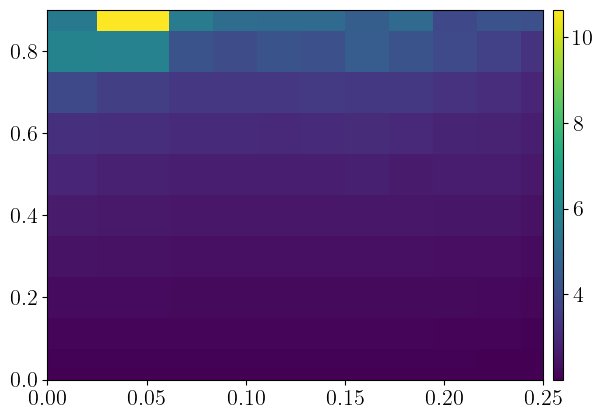

In [4]:
pcolor( ecs, 1-phi0s, elongation_ratio_extend)
cb_ax=add_colorbar_to_side(plt.gca())
cb_ax.yaxis.label.set_size(16)

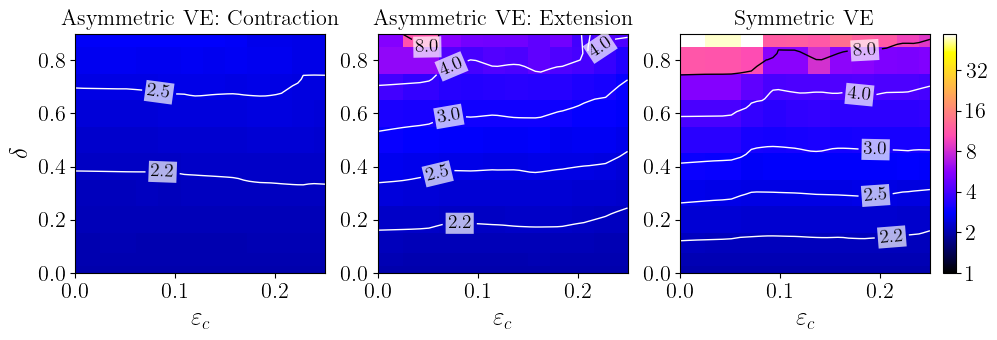

In [16]:
##################################################################
################## ELONGATION RATIO HEATMAP ######################
##################################################################

fig, axs = plt.subplots(1,3)
fig.set_size_inches(9.5, 3.5)
# plt.get_current_fig_manager().canvas.set_window_title('Middle')
axs=axs.ravel()
# for i in range(mid.shape[-1]):
        # plt.sca(axs[i])
plt.get_current_fig_manager().set_window_title('Depth (Basal)')

cmap = 'gnuplot2'
ratios = (elongation_ratio_contract, elongation_ratio_extend, elongation_ratio_sym)
vmax = np.log2(max(*[np.nanmax(d) for d in ratios ]))
plt.sca(axs[0])
plt.ylabel('$\delta$')
imgs=[]
for r, ax, title in zip(ratios, axs,
                    ('Asymmetric VE: Contraction','Asymmetric VE: Extension', 'Symmetric VE')):
    plt.sca(ax)
    data =  np.log2(r)
    # vmax = np.nanmax(data)
    rez = pcolor( ecs, 1-phi0s, data, vmin=0, vmax=vmax, cmap=cmap)
    imgs.append(rez)
    # ax.tick_params(labelsize = tick_style['fontsize'])
    ax.set_title(title, usetex=True, fontsize=16) 
    plt.xlabel(r'$\varepsilon_c$')
    # contour( ecs, 1-phi0s, r, upscale=4, levels=[ 2,2.5], color='w')
    # ax.clabel(CS, inline=True, fontsize=10)
plt.tight_layout()
# pcolor( ecs, 1-phi0s, 50*(depth_sym-(depth_baseline+depth_extend-2*depth_baseline[0,0])-depth_baseline[0,0])/(depth_baseline[0,0]), vmin=0, vmax=vmax)





for r, ax,  title, img in zip(ratios, axs,
                    ('Asymmetric VE: Contraction','Asymmetric VE: Extension', 'Symmetric VE'),
                    imgs):

    CS=contour( ecs, 1-phi0s, r, upscale=4, sampling='linear', levels=[2.2, 2.5, 3, 4, 8], color=('w','w','w','w','k'), ax=ax)
    clbls=ax.clabel(CS, inline=True, fontsize=14)
    for lbl in clbls:
        lbl.set_backgroundcolor([1,1,1,0.1])
        # facecolor = 'w' if lbl.get_color()==(0.0,0.0,0.0,1.0) else 'k'
        facecolor = 'w'
        lbl.set_color('k')
        lbl.set_bbox(dict(facecolor=facecolor, alpha=0.7, boxstyle= mpl.patches.BoxStyle.Square(pad=0.1), linewidth=0))

cb_ax=add_colorbar_to_side( axs[-1], side='right')
# cbar=plt.colorbar(img, cax=cb_ax, ax=ax, orientation='horizontal')
cb_ax.yaxis.label.set_size(16)
ticks = list(range(6))
lbls = [ plt.Text(1,p,f'$\\mathdefault{{{2**p}}}$') for p in ticks]

cb_ax.set_yticks(ticks, labels=lbls);



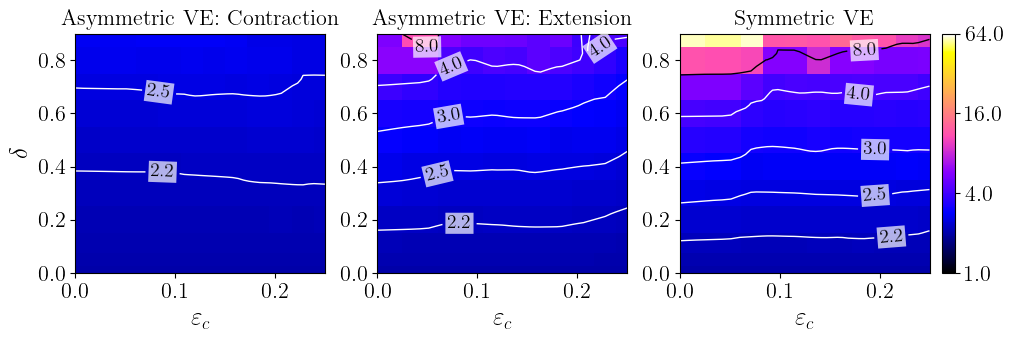

In [26]:
def draw_contour_lines(ax,d):
    CS=contour( ecs, 1-phi0s, d, upscale=4, sampling='linear', levels=[2.2, 2.5, 3, 4, 8], color=('w','w','w','w','k','k'), ax=ax)
    clbls=ax.clabel(CS, inline=True, fontsize=14)
    for lbl in clbls:
        lbl.set_backgroundcolor([1,1,1,0.1])
        # facecolor = 'w' if lbl.get_color()==(0.0,0.0,0.0,1.0) else 'k'
        facecolor = 'w'
        lbl.set_color('k')
        lbl.set_bbox(dict(facecolor=facecolor, alpha=0.7, boxstyle= mpl.patches.BoxStyle.Square(pad=0.1), linewidth=0))

panelled_row(ratios, plot_func=lambda d:  pcolor( ecs, 1-phi0s, d, vmin=0, vmax=6, cmap='gnuplot2'),
             data_transform=np.log2, colorbar=True, colorbar_tick_transform=lambda t:2**t,
             ax_callback=draw_contour_lines,
             xlabel=r'$\varepsilon_c$', ylabel='$\delta$',
             panel_titles=('Asymmetric VE: Contraction','Asymmetric VE: Extension', 'Symmetric VE'))

In [13]:
2**vmax

59.474535937123974